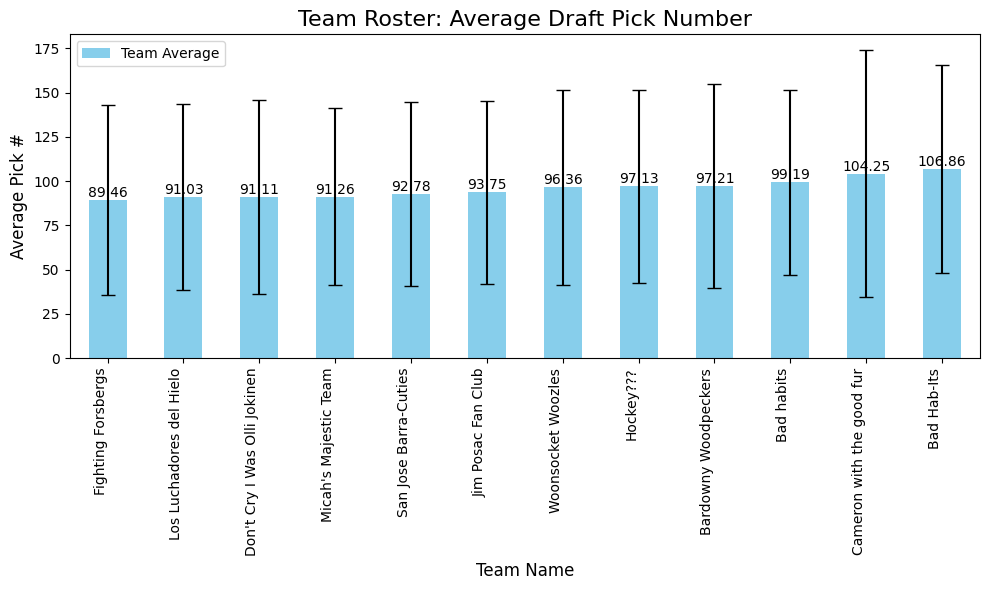

ANOVA Results:
F-statistic: nan, p-value: nan

Tukey HSD Pairwise Comparisons:
                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
           group1                       group2            meandiff p-adj lower upper reject
-------------------------------------------------------------------------------------------
                 Bad Hab-Its                   Bad habits  -7.6625   nan   nan   nan  False
                 Bad Hab-Its         Bardowny Woodpeckers    -9.65   nan   nan   nan  False
                 Bad Hab-Its    Cameron with the good fur      nan   nan   nan   nan  False
                 Bad Hab-Its Don't Cry I Was Olli Jokinen   -15.75   nan   nan   nan  False
                 Bad Hab-Its           Fighting Forsbergs -17.3937   nan   nan   nan  False
                 Bad Hab-Its                    Hockey???   -9.725   nan   nan   nan  False
                 Bad Hab-Its           Jim Posac Fan Club -13.1062   nan   nan   nan  False
 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Function to load the CSV file, plot the graph, and perform pairwise comparisons
def plot_avg_pick_with_stats(csv_file):
    # Load the dataset
    df = pd.read_csv(csv_file)

    # Perform one-way ANOVA
    anova_results = stats.f_oneway(*[df[df['Team Name'] == team]['Avg. Pick'] for team in df['Team Name'].unique()])
    
    # Perform Tukey's HSD test for pairwise comparisons
    tukey = pairwise_tukeyhsd(endog=df['Avg. Pick'], groups=df['Team Name'], alpha=0.05)

    # Calculate the mean and standard deviation of 'Avg. Pick' per team
    team_avg_pick = df.groupby('Team Name')['Avg. Pick'].mean()
    team_std_pick = df.groupby('Team Name')['Avg. Pick'].std()

    # Sort teams by ascending average pick
    team_avg_pick = team_avg_pick.sort_values(ascending=True)
    team_std_pick = team_std_pick.loc[team_avg_pick.index]

    # Plot the bar graph with error bars (standard deviation)
    plt.figure(figsize=(10, 6))
    bars = team_avg_pick.plot(kind='bar', color='skyblue', yerr=team_std_pick, capsize=5, label='Team Average')

    # Adding the value on top of each bar
    for i, bar in enumerate(bars.patches):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    # Overlay individual points for each player in each team
   # for team in team_avg_pick.index:
        #team_data = df[df['Team Name'] == team]
       # x_vals = [team] * len(team_data)  # X-axis positions for individual points
       # plt.scatter(x_vals, team_data['Avg. Pick'], color='black', label='Individual Picks' if team == team_avg_pick.index[0] else "")

    # Adding labels and title
    plt.title('Team Roster: Average Draft Pick Number', fontsize=16)
    plt.xlabel('Team Name', fontsize=12)
    plt.ylabel('Average Pick #', fontsize=12)
    plt.xticks(rotation=90, ha='right')
    
    # Show the legend
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print ANOVA results
    print('ANOVA Results:')
    print(f'F-statistic: {anova_results.statistic:.3f}, p-value: {anova_results.pvalue:.3f}\n')

    # Print Tukey HSD results
    print('Tukey HSD Pairwise Comparisons:')
    print(tukey)

# Example usage with relative path
csv_file = '../Data/Yahoo-453.l.82957-Draft.csv'  # Ensure this path is correct relative to your working directory
plot_avg_pick_with_stats(csv_file)

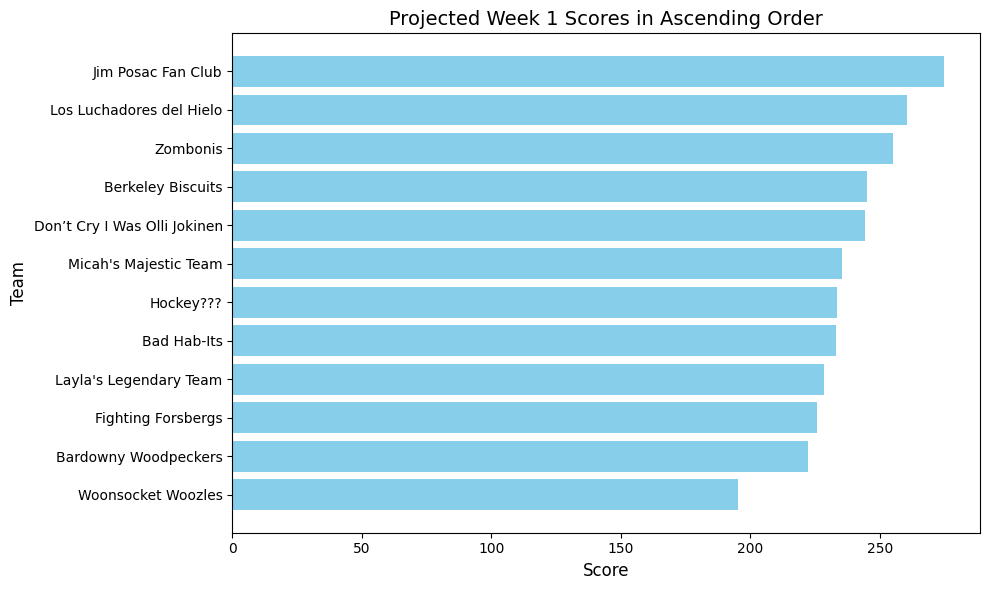

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Data extracted from the image
data = {
    "team": [
        "Berkeley Biscuits", "Hockey???", "Bad Hab-Its", 
        "Woonsocket Woozles", "Zombonis", "Fighting Forsbergs", 
        "Micah's Majestic Team", "Jim Posac Fan Club", 
        "Layla's Legendary Team", "Los Luchadores del Hielo", 
        "Bardowny Woodpeckers", "Don’t Cry I Was Olli Jokinen"
    ],
    "score": [
        245.01, 233.57, 233.09, 195.38, 255.00, 225.52, 
        235.29, 274.88, 228.27, 260.55, 222.29, 244.29
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by score in ascending order
df_sorted = df.sort_values(by='score')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['team'], df_sorted['score'], color='skyblue')

# Add labels and title
plt.xlabel('Score', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('Projected Week 1 Scores in Ascending Order', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()